In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import datetime
import pandas_datareader as data

In [82]:
SPY_Firms = pd.read_csv('Firm_SPY500.csv')
SPY_Firms.head(3)

,Unnamed: 0,Symbol,Security,GICS Sector,Headquarters Location
0,0,MMM,3M,Industrials,"Saint Paul, Minnesota"
1,1,ABT,Abbott Laboratories,Health Care,"North Chicago, Illinois"
2,2,ABBV,AbbVie,Health Care,"North Chicago, Illinois"


In [ ]:
#discuss length being 505 see wiki

In [26]:
#create list of all Firm Symbol(Tickers) for looping purposes
Symbols = []
for symbol in SPY_Firms['Symbol']:
    Symbols.append(symbol)
Symbols.sort()

In [32]:
#Import Data on each stock for last 30 days as dictionary
start = datetime.datetime(2021,10,11)
end = datetime.datetime(2021,11,22)
d = {}
for symbol in Symbols:
        try:
            d[symbol] = data.DataReader(symbol, 
                       start=start, 
                       end=end, 
                       data_source='yahoo')
        except KeyError:
            print('uh oh')

In [33]:
#Convert dictionary to DataFrame through concatination of dictionary values
Firms_SPY500_30 = pd.concat(d.values(),axis = 1, keys = Symbols)
Firms_SPY500_30.columns.names = ['Symbol', 'Info']
Firms_SPY500_30.to_pickle('Firms_SPY500_30.pkl')

In [46]:
#check for missing values FIND BETTER WAY
Firms_SPY500_30.isna().sum().sort_values().head(2)

Symbol  Info     
A       High         0
NOW     Adj Close    0
dtype: int64

In [52]:
#DataFrame of solely the adjusted returns
Firms_SPY500_30_Adj = Firms_SPY500_30.xs(key = 'Adj Close', axis = 1, level='Info')
Firms_SPY500_30_Adj.head(2)

Symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-11,150.020004,20.129999,212.119995,142.809998,109.018311,121.952042,332.149994,116.430458,325.533539,573.070007,...,62.439999,155.199997,60.743652,57.169998,118.532364,122.000000,143.789993,493.130005,62.439999,197.414230
2021-10-12,147.949997,20.290001,212.009995,141.509995,107.269516,119.291817,334.140015,116.868767,326.720001,580.690002,...,63.000000,155.910004,60.427898,56.910000,118.502434,122.360001,142.809998,494.540009,62.709999,196.914825


In [84]:
#Create DataFrame of Daily Returns for each stock
Firms_Daily_Return_30 = pd.DataFrame()
for symbol in Symbols:
    Firms_Daily_Return_30[symbol] = Firms_SPY500_30_Adj[symbol].pct_change()
Firms_Daily_Return_30.head(2)

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-12,-0.013798,0.007948,-0.000519,-0.009103,-0.016041,-0.021814,0.005991,0.003765,0.003645,0.013297,...,0.008969,0.004575,-0.005198,-0.004548,-0.000253,0.002951,-0.006815,0.002859,0.004324,-0.00253


In [85]:
#Create DataFrame for the cumulative returns of each stock
Firms_Daily_Return_30_Cum = (Firms_Daily_Return_30+1).cumprod() - 1
Firms_Daily_Return_30_Cum.tail(1)

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-22,0.085055,-0.024839,0.092919,0.127512,0.060831,-0.006823,0.009544,0.075835,0.116014,0.175371,...,0.061979,0.420941,0.012616,-0.084135,0.076584,0.036639,-0.094374,0.22274,0.061019,0.136392


In [86]:
#Verify Using Numpy
#(df_adj['AAPL'].loc[end] - df_adj['AAPL'].loc[start])/(df_adj['AAPL'].loc[start])
((Firms_SPY500_30_Adj.loc[end] - Firms_SPY500_30_Adj.loc[start])/Firms_SPY500_30_Adj.loc[start]).head(2)

Symbol
A      0.085055
AAL   -0.024839
dtype: float64

In [136]:
#Create DataFrame of 30 day cumulative Return
Firms_Daily_Return_30_Cum_Total = pd.DataFrame(Firms_Daily_Return_30_Cum.iloc[-1])
Firms_Daily_Return_30_Cum_Total.columns = ['30d Return']
Firms_Daily_Return_30_Cum_Total.index.name = ('Symbol')
SPY_Firms_30d_Returns = pd.DataFrame(SPY_Firms.merge(Firms_Daily_Return_30_Cum_Total, on= 'Symbol'))
SPY_Firms_30d_Returns.drop(columns = ['Unnamed: 0'], inplace = True)
SPY_Firms_30d_Returns.set_index('Symbol').sort_values('Symbol')

,Security,GICS Sector,Headquarters Location,30d Return
Symbol,,,,
A,Agilent Technologies,Health Care,"Santa Clara, California",0.085055
AAL,American Airlines Group,Industrials,"Fort Worth, Texas",-0.024839
AAP,Advance Auto Parts,Consumer Discretionary,"Raleigh, North Carolina",0.092919
AAPL,Apple,Information Technology,"Cupertino, California",0.127512
ABBV,AbbVie,Health Care,"North Chicago, Illinois",0.060831
...,...,...,...,...
YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",0.036639
ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",-0.094374
ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",0.222740


In [140]:
#The Top Ten Performing Stocks
###Insight 1, part 1. Note 2 sectors dominates
Top_Ten_Firms = SPY_Firms_30d_Returns.sort_values('30d Return', ascending = False).head(10)
Top_Ten_Firms

,Symbol,Security,GICS Sector,Headquarters Location,30d Return
171,ENPH,Enphase Energy,Information Technology,"Fremont, California",0.619248
349,NVDA,Nvidia,Information Technology,"Santa Clara, California",0.544141
441,TSLA,Tesla,Consumer Discretionary,"Palo Alto, California",0.460805
7,AMD,Advanced Micro Devices,Information Technology,"Santa Clara, California",0.457012
392,QCOM,Qualcomm,Information Technology,"San Diego, California",0.451897
498,XLNX,Xilinx,Information Technology,"San Jose, California",0.420941
440,TER,Teradyne,Information Technology,"North Reading, Massachusetts",0.382892
179,ETSY,Etsy,Consumer Discretionary,"New York City, New York",0.380053
199,F,Ford,Consumer Discretionary,"Dearborn, Michigan",0.364024
48,ANET,Arista Networks,Information Technology,"Santa Clara, California",0.357663


In [142]:
#Bottom 10 Performing Stocks
###Insight 1, part 2.Indeed presence of IT again says something which should prompt overall analysis of sectors
Top_Ten_Firms = SPY_Firms_30d_Returns.sort_values('30d Return', ascending = True).head(10)
Top_Ten_Firms

,Symbol,Security,GICS Sector,Headquarters Location,30d Return
366,PENN,Penn National Gaming,Consumer Discretionary,"Wyomissing, Pennsylvania",-0.263654
365,PYPL,PayPal,Information Technology,"San Jose, California",-0.257087
452,TWTR,Twitter,Communication Services,"San Francisco, California",-0.238164
151,DISH,Dish Network,Communication Services,"Meridian, Colorado",-0.223404
5,ATVI,Activision Blizzard,Communication Services,"Santa Monica, California",-0.185010
218,GPN,Global Payments,Information Technology,"Atlanta, Georgia",-0.184405
83,CZR,Caesars Entertainment,Consumer Discretionary,"Reno, Nevada",-0.177747
490,WU,Western Union,Information Technology,"Englewood, Colorado",-0.174272
88,CCL,Carnival Corporation,Consumer Discretionary,"Miami, Florida",-0.148660
473,VIAC,ViacomCBS,Communication Services,"New York City, New York",-0.148082


<AxesSubplot:>

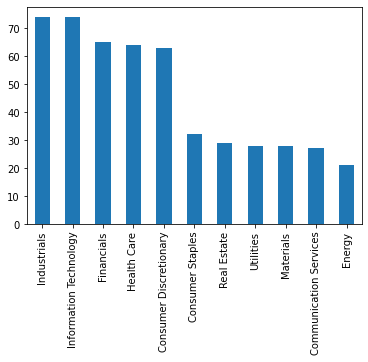

In [145]:
SPY_Firms_30d_Returns['GICS Sector'].value_counts().plot(kind = 'bar')

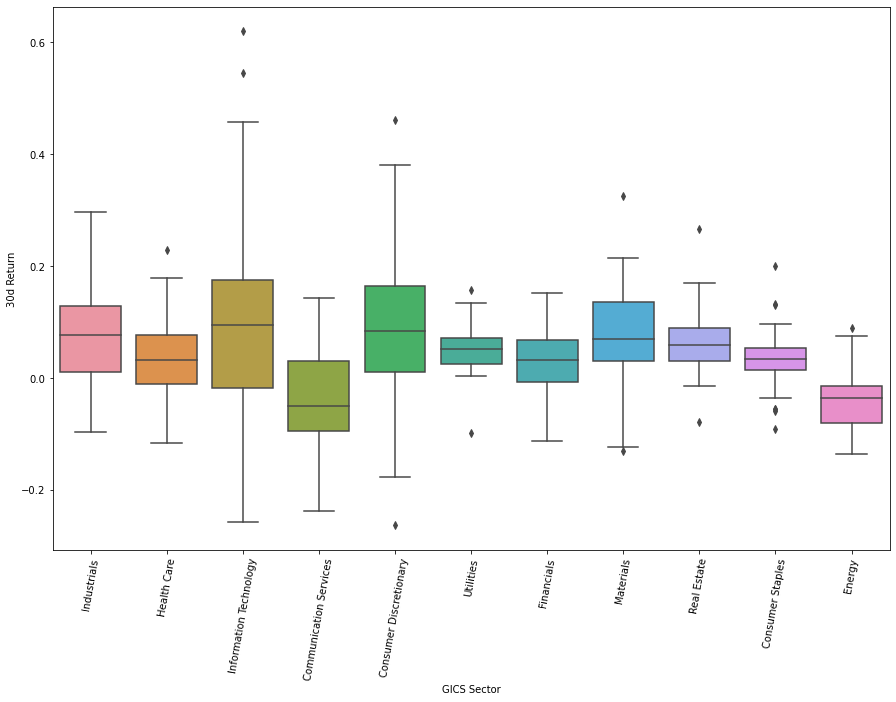

In [148]:
#Insight 2. Measure of skewness and distribution, we can see IT is very spread out vs utilites compact.
fig = plt.figure(figsize = (15,10))
a = sns.boxplot(x = SPY_Firms_30d_Returns['GICS Sector'], y = SPY_Firms_30d_Returns['30d Return'],data = SPY_Firms_30d_Returns, showfliers = True)
a.set_xticklabels(a.get_xticklabels(),rotation=80)
plt.show(a)
#Include overall median performance line

In [170]:
#Repeat for standard Deviation. include top ten, bottom 10 and then boxplot
SPY_Firms_30d_STD = pd.DataFrame(Firms_SPY500_30_Adj.std())
SPY_Firms_30d_STD.columns = ['30d Standard Deviation']
SPY_Firms_30d_STD = SPY_Firms.merge(SPY_Firms_30d_STD, on = 'Symbol')
SPY_Firms_30d_STD.drop(columns = ['Unnamed: 0'], inplace = True)
SPY_Firms_30d_STD.set_index('Symbol').sort_values('Symbol')

,Security,GICS Sector,Headquarters Location,30d Standard Deviation
Symbol,,,,
A,Agilent Technologies,Health Care,"Santa Clara, California",3.764859
AAL,American Airlines Group,Industrials,"Fort Worth, Texas",0.903216
AAP,Advance Auto Parts,Consumer Discretionary,"Raleigh, North Carolina",8.003462
AAPL,Apple,Information Technology,"Cupertino, California",4.538890
ABBV,AbbVie,Health Care,"North Chicago, Illinois",4.099141
...,...,...,...,...
YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",1.317207
ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",7.528680
ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",39.601141


In [174]:
#Top 10 volatile stock
(SPY_Firms_30d_STD.sort_values('30d Standard Deviation', ascending = False)).head(10)

,Symbol,Security,GICS Sector,Headquarters Location,30d Standard Deviation
441,TSLA,Tesla,Consumer Discretionary,"Palo Alto, California",138.399781
350,NVR,NVR,Consumer Discretionary,"Reston, Virginia",137.728192
24,AMZN,Amazon,Consumer Discretionary,"Seattle, Washington",115.680927
22,GOOG,Alphabet (Class C),Communication Services,"Mountain View, California",84.434040
21,GOOGL,Alphabet (Class A),Communication Services,"Mountain View, California",83.047670
72,BKNG,Booking Holdings,Consumer Discretionary,"Norwalk, Connecticut",81.782910
55,AZO,AutoZone,Consumer Discretionary,"Memphis, Tennessee",67.015735
314,MTD,Mettler Toledo,Health Care,"Columbus, Ohio",58.692048
320,MRNA,Moderna,Health Care,"Cambridge, Massachusetts",47.092920
377,POOL,Pool Corporation,Consumer Discretionary,"Covington, Louisiana",43.556777


In [177]:
(SPY_Firms_30d_STD.sort_values('30d Standard Deviation', ascending = True)).head(10)

,Symbol,Security,GICS Sector,Headquarters Location,30d Standard Deviation
25,AMCR,Amcor,Materials,"Zurich, Switzerland",0.202728
240,HBAN,Huntington Bancshares,Financials,"Columbus, Ohio; Detroit, Michigan",0.295761
379,PPL,PPL,Utilities,"Allentown, Pennsylvania",0.306974
97,CNP,CenterPoint Energy,Utilities,"Houston, Texas",0.315297
341,NI,NiSource,Utilities,"Merrillville, Indiana",0.374797
271,KEY,KeyCorp,Financials,"Cleveland, Ohio",0.399315
230,HPE,Hewlett Packard Enterprise,Information Technology,"Houston, Texas",0.403985
474,VTRS,Viatris,Health Care,"Pittsburgh, Pennsylvania",0.422397
298,MRO,Marathon Oil,Energy,"Houston, Texas",0.447928
51,T,AT&T,Communication Services,"Dallas, Texas",0.452583


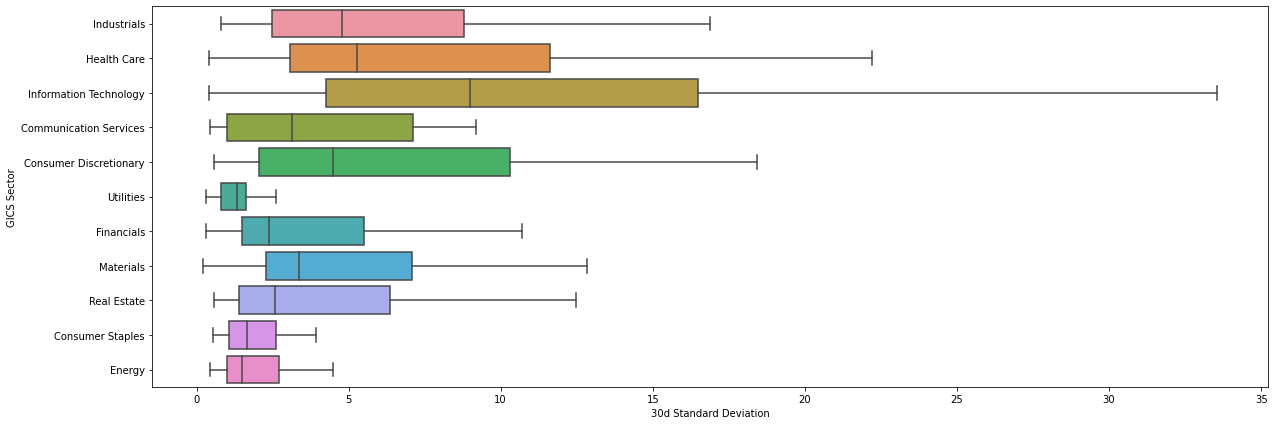

In [188]:
#std by sector, remember we're not looking for mean std of sector rather looking at how std's are spread out
#ignore outliers and hope for the best
fig = plt.figure(figsize = (20,7))
b = sns.boxplot(y = SPY_Firms_30d_STD['GICS Sector'], x = '30d Standard Deviation', data = SPY_Firms_30d_STD, showfliers = False)
b.set_yticklabels(b.get_yticklabels(),rotation=0)
plt.show(b)

In [272]:
#Correlation in this sense is strongest relationship
IT_list = list(SPY_Firms[SPY_Firms['GICS Sector'] == 'Information Technology']['Symbol'])
it_corr_abs_10= pd.DataFrame(Firms_Daily_Return_30[IT_list].corr().abs().unstack().sort_values(ascending = False)[74::2])
it_corr_abs_10.columns = ['Correlation Coefficient']
it_corr_abs_10.index.names = ['Symbol 1','Symbol 2']
it_corr_abs_10

,,Correlation Coefficient
Symbol 1,Symbol 2,
TXN,ADI,0.893832
SNPS,CDNS,0.867470
V,MA,0.846774
APH,ADI,0.837858
NXPI,MCHP,0.834784
...,...,...
QRVO,SNPS,0.001644
ADP,GLW,0.001435
FTNT,GPN,0.001124


In [273]:
it_corr

Correlation Coefficient
Symbol 1 Symbol 2                         
ACN      ACN                      1.000000
         ADBE                     0.613537
         AMD                      0.188889
         AKAM                     0.276719
         APH                      0.423404
...                                    ...
ZBRA     V                        0.086660
         WDC                      0.269132
         WU                      -0.087407
         XLNX                     0.230707
         ZBRA                     1.000000

[5476 rows x 1 columns]

In [280]:
it_corr = pd.DataFrame(Firms_Daily_Return_30[IT_list].corr().unstack())
it_corr.columns = ['Correlation Coefficient']
it_corr.index.names = ['Symbol 1','Symbol 2']
it_corr.merge(it_corr_abs_10, on = ['Symbol 1','Symbol 2'])['Correlation Coefficient_x'].nlargest(10)
it_corr.merge(it_corr_abs_10, on = ['Symbol 1','Symbol 2'])['Correlation Coefficient_x'].nsmallest(10)

Symbol 1  Symbol 2
JNPR      JKHY       -0.654836
          FISV       -0.608203
ENPH      APH        -0.595326
          FISV       -0.559302
JKHY      FFIV       -0.545499
          ENPH       -0.528389
JNPR      GPN        -0.525864
V         ENPH       -0.524452
JNPR      V          -0.509813
          ADI        -0.503932
Name: Correlation Coefficient_x, dtype: float64

# Check correlation within IT as it has both high performers and low performers.